In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal
sig = np.repeat([0.,1], 3500)
slope = np.repeat([0.],7000.)

win = signal.windows.hann(1000)
filtered = signal.convolve(sig, win, mode='same') / sum(win)

In [2]:
#def trapFilter_new(input1, rise_time, flat_top, length, tau):
length=7000
rise_time=20
flat_top=200
input1=sig

#initialize the arrays
d_k = [0]*length
p_n = [0]*length
t_n = [0]*length
trap_n = [0]*length
s_p = [0]*length
s_pf = [0]*length
p_nf = [0] *length

for i in range(0, length):
       
        #triangular filter
        if i>=(2*rise_time):
            t_n[i]=t_n[i-1]+ input1[i]-2*input1[i-rise_time]+input1[i-2*rise_time]
        
        #for trapezoidal
        if i>=i>=(2*rise_time +flat_top):
            trap_n[i] =trap_n[i-1] + input1[i]-input1[i-rise_time]-input1[i-rise_time-flat_top] + input1[i-2*rise_time-flat_top] 
        
        #for polynomial
        if i>=(2*rise_time + 1):
            p_n[i]=p_n[i-1]+input1[i]-input1[i-2*rise_time-1]
            s_p[i]=s_p[i-1]+p_n[i]-input1[i-rise_time]*(2*rise_time+1)
        #for poly trapezoid    
        if i>=(2*rise_time + flat_top):
            p_nf[i]=p_nf[i-1]+input1[i]-input1[i-rise_time]+input1[i-rise_time-flat_top]-input1[i-2*rise_time-flat_top]
            s_pf[i]=s_pf[i-1]+p_nf[i]-(input1[i-rise_time]+input1[i-rise_time-flat_top])*(rise_time) - input1[i-rise_time-flat_top] + input1[i-2*rise_time-flat_top]
    

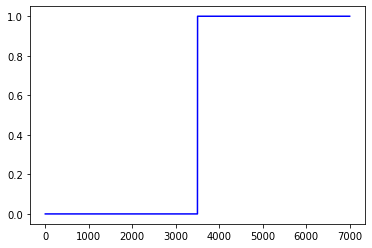

In [3]:
plt.plot(sig, color='b', label='wave', zorder=0)

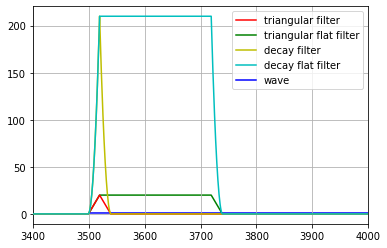

In [4]:
newfit1=t_n
newfit2=trap_n
newfit3=s_p
newfit4=s_pf

plt.plot(newfit1, color='r', label='triangular filter', zorder=2)
plt.plot(newfit2, color='g', label='triangular flat filter', zorder=1)
plt.plot(newfit3, color='y', label='decay filter', zorder=3)
plt.plot(newfit4, color='c', label='decay flat filter', zorder=4)

plt.plot(sig, color='b', label='wave', zorder=0)
plt.legend()
plt.xlim(3400,4000)
#plt.ylim(4.9,5.1)
plt.grid()
plt.show()
